<a href="https://colab.research.google.com/github/silviolima07/autoencoders/blob/main/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autoencoders
## - Seu principio de funcionamento é reproduzir na saida um conjunto de dados recebido na entrada.
## - Esse conjunto apresenta determinados padrões que o modelo deve reproduzir nos dados de saída.
# Aplicações na saúde
## - um dataset pode identificar comportamentos, sintomas ou alterações. Treinando o modelo com dados classificados como normal, ao receber dados com alterações, a saida gerada irá apresentar um erro. Esse erro a partir de determinado valor classifica uma linha desse conjunto como normal ou anormal.
# Em aplicações comerciais
## - um dataset que registra o comportamento de gastos de uma pessoa é usado para treinar um modelo. Quando os dados indicam um comportamento muito diferente, ele é classificado como fraude por exemplo.

#Um exemplo de remoção de ruido é apresentado.

# Autoencoder
## - pode ser usado para redução de dimensionalidade também, vc fornece uma quantidade de dados de entrada e ao passar pelo treinamento, ele identifica os principais atributos e gera na saida o equivalente porém em uma dimensão menor conforme foi construido o modelo.


In [ ]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from keras.datasets import mnist


# Caso de uso: Saúde

## Este dataset contém dados do registro do sinal ecg obtido em exames de eletrocardiograma. 
## Este exame avalia o batimento cardiaco e pode detectar anomalias no coração.

In [ ]:
df_ecg = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header = None)

In [ ]:
df_ecg.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


## Separando X e  y.
## dados receberá as colunas com os dados dos sinais coletados.
## labels receberá a colunas com as classificações do sinal.

In [ ]:
dados = df_ecg.iloc[:,:-1].values # Pega os dados em cada linha até a penultima coluna, na forma de array.
labels = df_ecg.iloc[:,-1].values

## Dados de treino e teste

In [ ]:
dados_treino, dados_teste, labels_treino, labels_teste = train_test_split(dados, labels, test_size = 0.2, random_state = 2)

## Normalização com MinMaxScaler

In [ ]:
min = tf.reduce_min(dados_treino)
max = tf.reduce_max(dados_treino)
#
dados_treino = (dados_treino - min)/(max - min)
dados_teste = (dados_teste - min) / (max - min)

## Converter 0 e 1 em True e False

In [ ]:
labels_treino = labels_treino.astype(bool)
labels_teste = labels_teste.astype(bool)

## Extrair apenas os dados considerados normal (1/True) em treino e teste.


In [ ]:
dados_treino_normal = dados_treino[labels_treino]
dados_teste_normal = dados_teste[labels_teste]

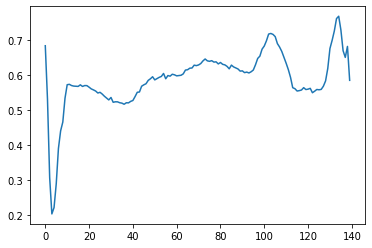

In [ ]:
plt.plot(np.arange(140), dados_treino_normal[0])

## Extrair apenas os dados considerados anormal (0/False) em treino e teste.
## O caracter ~ inverte o valor booleano de False para True e assim extraimos apenas o valores anormais.

In [ ]:
dados_treino_anormal = dados_treino[~labels_treino]
dados_teste_anormal = dados_teste[~labels_teste]

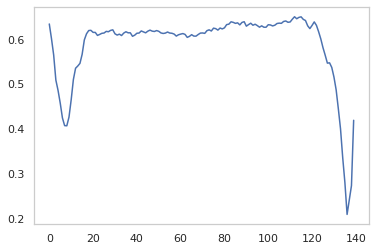

In [ ]:
plt.plot(np.arange(140), dados_treino_anormal[0])

## Um modelo de redes neurais será construído. 
## Ele receberá os dados de entrada, irá aprender as caracteristicas dos dados, afim de reproduzir o sinal na saída.

In [ ]:
#Build the Neural Network
input_dim = dados_treino_normal.shape[1]
 
model = Sequential()
model.add(Dense(32,input_dim = input_dim, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(input_dim, activation="sigmoid"))
model.compile(optimizer='adam', loss='mae')
 
#Check the architecture of the autoencoder
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                4512      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 16)                144       
                                                                 
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dense_5 (Dense)             (None, 140)               4620      
                                                                 
Total params: 10,484
Trainable params: 10,484
Non-traina

## Treinamento do modelo.
## Durante o treinamento o modelo irá receber os dados considerados normais e deverá apresentar na saída os mesmos sinais.
## O objetivo é o modelo saber as caracteristicas de um sinal normal e quando receber um novo conjunto de dados gerar um sinal normal a partir das caracteristicas que um sinal normal possue.

Epoch 1/30
5/5 [==============================] - 2s 121ms/step - loss: 0.1044 - val_loss: 0.1021
Epoch 2/30
5/5 [==============================] - 0s 38ms/step - loss: 0.1006 - val_loss: 0.0972
Epoch 3/30
5/5 [==============================] - 0s 32ms/step - loss: 0.0946 - val_loss: 0.0894
Epoch 4/30
5/5 [==============================] - 0s 49ms/step - loss: 0.0860 - val_loss: 0.0797
Epoch 5/30
5/5 [==============================] - 0s 38ms/step - loss: 0.0763 - val_loss: 0.0706
Epoch 6/30
5/5 [==============================] - 0s 26ms/step - loss: 0.0670 - val_loss: 0.0605
Epoch 7/30
5/5 [==============================] - 0s 30ms/step - loss: 0.0569 - val_loss: 0.0511
Epoch 8/30
5/5 [==============================] - 0s 39ms/step - loss: 0.0478 - val_loss: 0.0427
Epoch 9/30
5/5 [==============================] - 0s 47ms/step - loss: 0.0400 - val_loss: 0.0361
Epoch 10/30
5/5 [==============================] - 0s 30ms/step - loss: 0.0338 - val_loss: 0.0311
Epoch 11/30
5/5 [===========

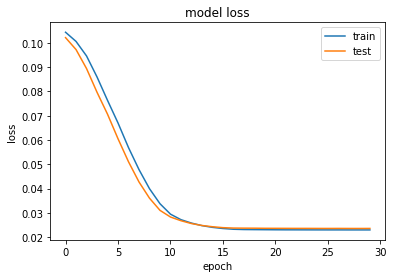

In [ ]:
#Fit the autoencoder and check loss for train and test
checkpointer = ModelCheckpoint(filepath="nae.h5", verbose=0, save_best_only=True)
 
#Save history to plot learning curves
history = model.fit(dados_treino_normal, dados_treino_normal,
epochs=30,
batch_size=512,
shuffle=True,
validation_data=(dados_teste_normal, dados_teste_normal),
verbose=1,
callbacks=[checkpointer]).history
 
autoencoder = load_model('nae.h5')
 
#Plot losses
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

## Avaliando se o modelo aprendeu as caracteristicas de um sinal normal.
## O modelo é usado com um sinal considerado normal, extraido do conjunto de treino com dados normal.

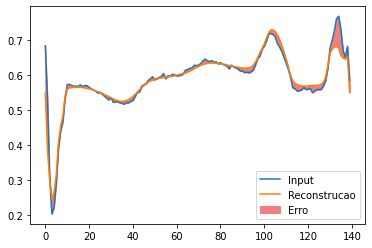

In [ ]:
dados_normal = dados_treino_normal[0]
dados_recons = model.predict(dados_treino_normal)[0]
plt.plot(np.arange(140), dados_normal)
plt.plot(np.arange(140), dados_recons)
plt.fill_between(np.arange(140),dados_normal, dados_recons, color='lightcoral')
plt.legend(labels=['Input', 'Reconstrucao', 'Erro'])
plt.show()

## O modelo recebe um sinal anormal e aplica o aprendizado de um sinal normal sobre os dados.
## A area em vermelho identifica o erro ao tentar reproduzir um sinal normal a partir de dados de um sinal anormal.

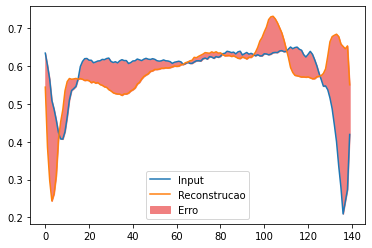

In [ ]:
dados_anormal = dados_treino_anormal[0]
dados_recons = model.predict(dados_treino_anormal)[0]
plt.plot(np.arange(140), dados_anormal)
plt.plot(np.arange(140), dados_recons)
plt.fill_between(np.arange(140),dados_anormal, dados_recons, color='lightcoral')
plt.legend(labels=['Input', 'Reconstrucao', 'Erro'])
plt.show()

## Quando o modelo foi apresentado a dados de treino normal, o erro representado pela area colorida significa a diferença entre o valor previsto e o valor real foi baixo. Já com dados de um sinal anormal, o erro foi bem expressivo.
## Para usar o modelo e identificar se o conjunto de dados representa um sinal normal ou uma anomalia, é preciso identificar a distribuição dos dados no conjunto considerado normal e a partir dai, definir um valor considerado limite, threshold, a partir do qual o conjunto será classificado como normal ou anomalia.
## Para isso usamos histograma.

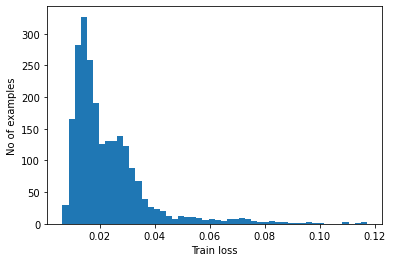

In [ ]:
reconstructions = model.predict(dados_treino_normal)
train_loss = tf.keras.losses.mae(reconstructions, dados_treino_normal)
# Histograma
plt.hist(train_loss[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

## O valor limite será definido a partir do valor médio da perda mais o desvio padrão.

In [ ]:
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  0.03752197868762033


## Quando um novo conjunto de dados for aplicado ao modelo, se o erro encontrado for maior que o threshold esse pode ser classificado como anomalia, pois as caracteristicas de um conjunto normal foram implementadas mas apresentou um erro acima do limite estabelecido.

# Caso de uso: Comercio em geral

## O dataset Creditcard traz um conjunto de dados classificados como normal e fraude.
## O conjunto de dados será dividido em normal e fraude.
## O conjunto de treino receberá 80% do conjunto classificado como normal.

In [ ]:
%matplotlib inline
sns.set(style='whitegrid')
 
# Dados de uma competição do Kaggle
# https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset/creditcard.csv")
 
# Coluna que será excluída pois não será considerada.
df = df.drop(['Time'], axis=1)
 
# Foi aplicada a redução de dimensionalidade com PCA, a maiorias das colunas são componentes
# A coluna Amount será normalizada.
df['Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
 
# Divisão em operações classificadas como fraude e normal.
df_fraud = df[df['Class']==1]
df_normal = df[df['Class']==0]
df_normal = df_normal.sample(frac = 1.0).reset_index(drop = True)

# df_normal_treino terá 80% do conjunto de dados classificado como normal
# df_normal_teste terá 20%.
df_normal_treino= df_normal.iloc[:int(df_normal.shape[0]*0.8),:] 
df_normal_teste = df_normal.iloc[int(df_normal.shape[0]*0.8):,:]
 
# Para tornar o conjunto mais proximo da realidade, um conjunto de teste será gerado com dados de fraude e dados normal. 
X_test = pd.concat([df_fraud,df_normal_teste], axis = 0)
X_test = X_test.sample(frac = 1.0).reset_index(drop = True)

 
# Treino e teste
X_train = df_normal_treino[df_normal_treino['Class'] == 0]
X_train = X_train.drop(['Class'], axis=1)
 
y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)

In [ ]:
df_normal.shape

(284315, 30)

In [ ]:
df_normal.iloc[0,:]

V1        1.173084
V2        0.060862
V3        0.479052
V4        0.466952
V5       -0.345566
V6       -0.226278
V7       -0.202649
V8        0.150534
V9       -0.030743
V10       0.095316
V11       1.491199
V12       0.483873
V13      -1.027493
V14       0.710627
V15       0.719358
V16       0.265421
V17      -0.325286
V18      -0.343301
V19      -0.178772
V20      -0.192848
V21      -0.192364
V22      -0.619422
V23       0.168021
V24      -0.021231
V25       0.072795
V26       0.111082
V27      -0.024526
V28       0.002784
Amount   -0.345313
Class     0.000000
Name: 0, dtype: float64

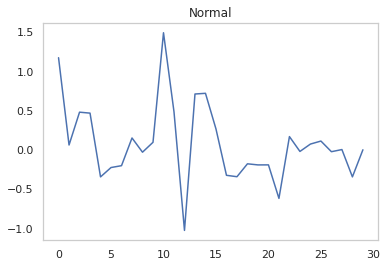

In [ ]:
plt.plot(np.arange(30),df_normal.iloc[0,:])
plt.grid()
plt.title("Normal")
plt.show()

In [ ]:
df_fraud.iloc[0,:]

V1       -2.312227
V2        1.951992
V3       -1.609851
V4        3.997906
V5       -0.522188
V6       -1.426545
V7       -2.537387
V8        1.391657
V9       -2.770089
V10      -2.772272
V11       3.202033
V12      -2.899907
V13      -0.595222
V14      -4.289254
V15       0.389724
V16      -1.140747
V17      -2.830056
V18      -0.016822
V19       0.416956
V20       0.126911
V21       0.517232
V22      -0.035049
V23      -0.465211
V24       0.320198
V25       0.044519
V26       0.177840
V27       0.261145
V28      -0.143276
Amount   -0.353229
Class     1.000000
Name: 541, dtype: float64

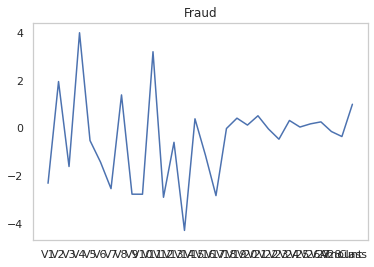

In [ ]:
plt.plot(df_fraud.iloc[0,:])
plt.grid()
plt.title("Fraud")
plt.show()

## Construção do modelo que será usado no treinamento

In [ ]:
#Build the Neural Network
input_dim = X_train.shape[1]
 
model = Sequential()
model.add(Dense(29,input_dim = input_dim, activation="relu"))
model.add(Dense(14, activation="relu"))
model.add(Dense(7, activation="relu"))
model.add(Dense(14, activation="relu"))
model.add(Dense(input_dim, activation="sigmoid"))
model.compile(optimizer='adam', loss='mae', metrics=['accuracy'])
 
#Check the architecture of the autoencoder
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 29)                870       
                                                                 
 dense_49 (Dense)            (None, 14)                420       
                                                                 
 dense_50 (Dense)            (None, 7)                 105       
                                                                 
 dense_51 (Dense)            (None, 14)                112       
                                                                 
 dense_52 (Dense)            (None, 29)                435       
                                                                 
Total params: 1,942
Trainable params: 1,942
Non-trainable params: 0
_________________________________________________________________


## Treinamento.
## O modelo é treinado com dados apenas de operações classificadas como normal.
## A validação é feita com dados de teste onde existem dados classificados com fraude e normal.
## O modelo deve aprender as caracteristicas de uma operação normal e ser avaliada a partir de dados que indicam fraude e normal.

Epoch 1/30
7108/7108 [==============================] - 17s 2ms/step - loss: 0.5645 - accuracy: 0.4388 - val_loss: 0.5625 - val_accuracy: 0.4986
Epoch 2/30
7108/7108 [==============================] - 17s 2ms/step - loss: 0.5356 - accuracy: 0.5052 - val_loss: 0.5505 - val_accuracy: 0.5022
Epoch 3/30
7108/7108 [==============================] - 17s 2ms/step - loss: 0.5242 - accuracy: 0.5229 - val_loss: 0.5425 - val_accuracy: 0.5331
Epoch 4/30
7108/7108 [==============================] - 18s 3ms/step - loss: 0.5205 - accuracy: 0.5260 - val_loss: 0.5399 - val_accuracy: 0.5195
Epoch 5/30
7108/7108 [==============================] - 18s 3ms/step - loss: 0.5179 - accuracy: 0.5270 - val_loss: 0.5383 - val_accuracy: 0.5250
Epoch 6/30
7108/7108 [==============================] - 18s 3ms/step - loss: 0.5158 - accuracy: 0.5320 - val_loss: 0.5358 - val_accuracy: 0.5310
Epoch 7/30
7108/7108 [==============================] - 18s 3ms/step - loss: 0.5132 - accuracy: 0.5374 - val_loss: 0.5337 - val_ac

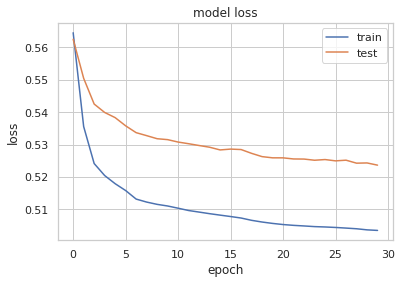

In [ ]:
#Fit the autoencoder and check loss for train and test
checkpointer = ModelCheckpoint(filepath="nae.h5", verbose=0, save_best_only=True)
 
#Save history to plot learning curves
history = model.fit(X_train, X_train, # Dados de operações normal
epochs=30,
batch_size=32,
shuffle=True,
validation_data=(X_test, X_test), # Dados de operações com fraude e normal
verbose=1,
callbacks=[checkpointer]).history
 
autoencoder = load_model('nae.h5')
 
#Plot losses
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

## Avaliação do modelo
## O modelo aplicado aos dados de teste.
## A metrica MAE é usada para avaliar o valor previsto e o valor real.


[Text(0, 0.5, 'Normal'), Text(0, 1.5, 'Fraud')]

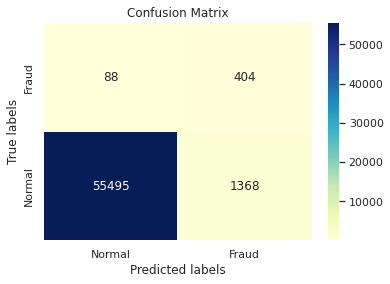

In [ ]:
predictions = model.predict(X_test)
 
mae= tf.keras.losses.mae(X_test, predictions)

error_df = pd.DataFrame({'mae': mae,
'fraud': y_test})
 
#Set an error threshold above which a transaction is considered fraud
threshold = 1.25
error_df['pred_01'] = [1 if e > threshold else 0 for e in error_df['mae'].values]
conf_mat = confusion_matrix(error_df['fraud'], error_df['pred_01'])
 
#Print confusion matrix for the given threshold
ax= plt.subplot()
sns.heatmap(conf_mat, annot=True, fmt="g", cmap="YlGnBu")
 
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.set_ylim([0,2])
ax.xaxis.set_ticklabels(["Normal", "Fraud"]); ax.yaxis.set_ticklabels(["Normal", "Fraud"])


## Ao aplicar os dados de teste no modelo treinado. a matriz de confusão mostra que 55495 operações classificadas como normal foram identificadas corretamente.
## De 492 (88+404) foram corretamente identificadas como fraude 404.
## Porém 1368 foram previstas como fraude e na realidade são normal
## Melhorias possíveis:
- aumento de número de epocas de treinamento
- aumento do número de  camadas no modelo
- ajuste da divisão treino e teste


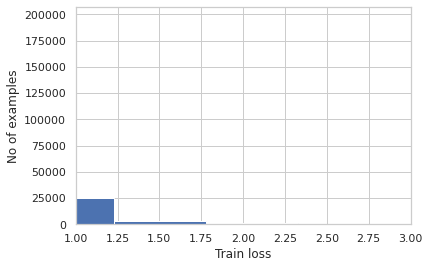

In [ ]:
normal_pred = model.predict(X_train)
train_loss =  tf.keras.losses.mae(normal_pred, X_train)
# Histograma
plt.hist(train_loss, bins=50)
plt.xlabel("Train loss")
plt.xlim(1,3)
plt.ylabel("No of examples")
plt.show()

## Case de uso: remover ruido em imagens

## Dataset mnist com números escritos a mão.

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

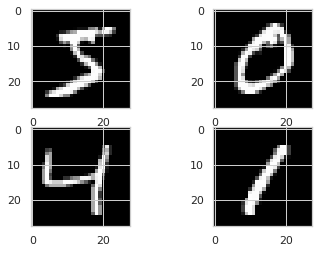

In [ ]:

plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()


## Reshape dos dados para linhas e colunas

In [ ]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
X_test.shape

(10000, 784)

In [ ]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Adicionar um fator de ruido aos dados convertidos.

In [ ]:
noise_factor = 0.2
x_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
x_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [ ]:
x_train_noisy.shape

(60000, 784)

## Imagem com ruido e imagem original

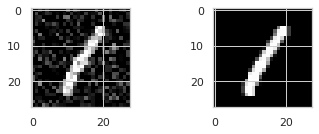

In [ ]:

noisy = np.reshape(x_train_noisy, (60000,28,28)) *255
plt.subplot(221)
plt.imshow(noisy[3], cmap=plt.get_cmap('gray'))
plt.subplot(222)
normal = np.reshape(X_train, (60000,28,28)) *255
plt.imshow(normal[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

## Criação do modelo

In [ ]:
# create model
model = Sequential()
model.add(Dense(500, input_dim=num_pixels, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(784, activation='sigmoid'))

In [ ]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

## Treinamento do modelo
## É apresentado ao modelo o conjunto de dados com ruido na entrada e o conjunto de dados sem ruido na saída.
## O modelo deve aprender a recriar o conjunto sem ruido.
## A validação segue o mesmo principio.

In [ ]:
# Training model
model.fit(x_train_noisy, # training data
          X_train,       # labels / target
          validation_data=(x_test_noisy, X_test), 
          epochs=2,
          batch_size=200)

Epoch 1/2
300/300 [==============================] - 11s 34ms/step - loss: 0.0420 - val_loss: 0.0200
Epoch 2/2
300/300 [==============================] - 10s 34ms/step - loss: 0.0168 - val_loss: 0.0137


In [ ]:
pred = model.predict(x_test_noisy)

In [ ]:
pred.shape

(10000, 784)

In [ ]:
X_test.shape

(10000, 784)

Imagem original de teste


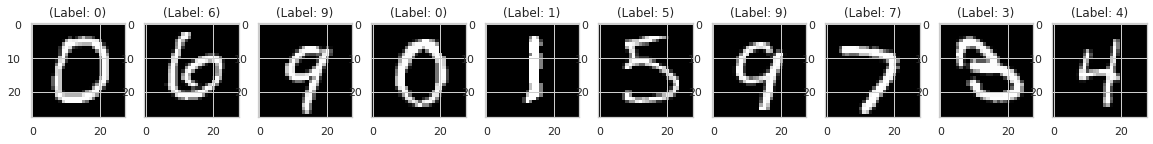

Imagem teste com uido


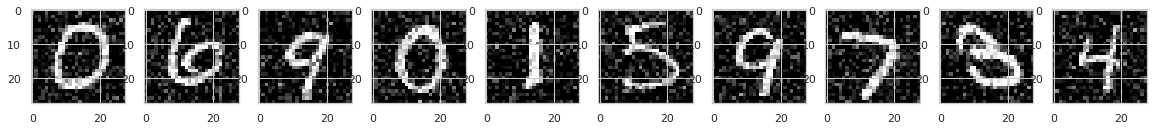

Imagem prevista pelo modelo - sem ruido


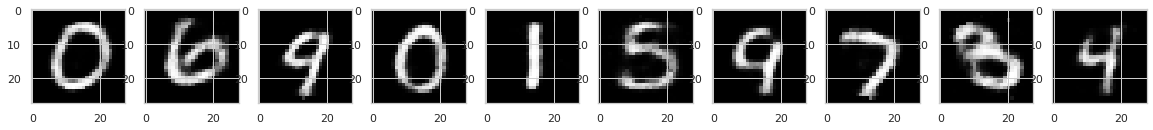

In [ ]:
X_test = np.reshape(X_test, (10000,28,28)) *255
pred = np.reshape(pred, (10000,28,28)) *255
x_test_noisy = np.reshape(x_test_noisy, (-1,28,28)) *255
plt.figure(figsize=(20, 4))
print("Imagem original de teste")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(X_test[i,:,:], cmap='gray')
    curr_lbl = y_test[i]
    plt.title("(Label: " + str(curr_lbl) + ")")
plt.show()    
plt.figure(figsize=(20, 4))
print("Imagem teste com uido")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test_noisy[i,:,:], cmap='gray')
plt.show()    
plt.figure(figsize=(20, 4))
print("Imagem prevista pelo modelo - sem ruido")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(pred[i,:,:], cmap='gray')  
plt.show()

## Se aumentar o numero de épocas de treinamento do modelo, a saida com a imagem prevista deverá ter uma melhora e ficar mais próxima a imagem original.